Fullname: Vũ Minh Phát

Student ID: 21127739

# HW3: CUDA Memory

**To compile your file, you can use this command:** \
`nvcc filename.cu -o execute_filename` \
***You can use Vietnamese to anwser the questions***

You can add/delete cells as you see fit. Just don't delete the cells with the Teacher's words.

---

Below is the command to install `Nsight system` on Colab. You just need to run the cell.

In [1]:
# Here is the command to install Nsight system on Colab. You just need to run the cell.
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
!apt update
!apt install ./nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
!apt --fix-broken install

--2024-12-05 21:49:55--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317705436 (303M) [application/x-deb]
Saving to: ‘nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb’

nsight-systems-2023 100%[===================>] 302.99M   212MB/s    in 1.4s    

2024-12-05 21:49:56 (212 MB/s) - ‘nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb’ saved [317705436/317705436]

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidi

- The above installation will be remove when colab restart its runtime. It should be fine for this homework because we don't use Nsight system that much.
- But if you want to persistent install Nsight system, you mount space from your Google Drive to your Colab VM. Read [Here](https://stackoverflow.com/questions/76784746/how-to-use-nsys-in-google-colab) for guidelines how to do thhis.

---

## Question 1

**Đề bài**: Áp dụng hiểu biết về các loại bộ nhớ trong CUDA để tối ưu hóa chương trình làm mờ ảnh RGB (cách làm mờ giống như ở `HW1`).

Biên dịch file code `HW3_P1.cu` với trình biên dịch NVCC:

In [2]:
!nvcc HW3_P1.cu -o HW3_P1

Chạy chương trình với các kích thước block khác nhau:
- Với kích thước block 16x16:

In [4]:
!./HW3_P1 in.pnm out.pnm 16 16

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Image size (width x height): 512 x 512

Kernel 1, block size 16x16, grid size 32x32
Kernel time: 0.954976 ms
Error: 0.000703

Kernel 2, block size 16x16, grid size 32x32
Kernel time: 0.356992 ms
Error: 0.000703

Kernel 3, block size 16x16, grid size 32x32
Kernel time: 0.284320 ms
Error: 0.000703


- Với kích thước block 16x32:

In [6]:
!./HW3_P1 in.pnm out.pnm 16 32

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Image size (width x height): 512 x 512

Kernel 1, block size 16x32, grid size 32x16
Kernel time: 0.875616 ms
Error: 0.000703

Kernel 2, block size 16x32, grid size 32x16
Kernel time: 0.359360 ms
Error: 0.000703

Kernel 3, block size 16x32, grid size 32x16
Kernel time: 0.290848 ms
Error: 0.000703


- Với kích thước block 16x64:

In [8]:
!./HW3_P1 in.pnm out.pnm 16 64

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Image size (width x height): 512 x 512

Kernel 1, block size 16x64, grid size 32x8
Kernel time: 0.968448 ms
Error: 0.000703

Kernel 2, block size 16x64, grid size 32x8
Kernel time: 0.399424 ms
Error: 0.000703

Kernel 3, block size 16x64, grid size 32x8
Kernel time: 0.311584 ms
Error: 0.000703


- Với kích thước block 32x32:

In [10]:
!./HW3_P1 in.pnm out.pnm 32 32

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Image size (width x height): 512 x 512

Kernel 1, block size 32x32, grid size 16x16
Kernel time: 0.757248 ms
Error: 0.000703

Kernel 2, block size 32x32, grid size 16x16
Kernel time: 0.385152 ms
Error: 0.000703

Kernel 3, block size 32x32, grid size 16x16
Kernel time: 0.307040 ms
Error: 0.000703


**Nhận xét**: Dựa trên kết quả về thời gian thực thi của các hàm kernel từ các thí nghiệm bên trên, ta có thể đưa ra một số nhận xét về hiệu suất của chương trình CUDA khi sử dụng các loại bộ nhớ khác nhau:

---

`1.` **Hàm kernel có sử dụng SMEM (shared memory) sẽ chạy nhanh hơn hàm kernel không sử dụng SMEM:**

- **Hàm kernel `blurImgKernel1` (sử dụng global memory cho cả `inPixels` và `filter`):**
  - Trong hàm kernel 1, cả `inPixels` và `filter` đều được lưu trong global memory. Điều này dẫn đến mỗi thread phải thực hiện nhiều lần truy cập đến GMEM (global memory) để đọc dữ liệu cần thiết cho việc tính toán.
  
  - Tuy nhiên, global memory vốn có độ trễ cao và băng thông thấp hơn so với một số loại bộ nhớ khác trong CUDA. Do đó, việc sử dụng global memory để lưu trữ dữ liệu `inPixels` và `filter` đã làm giảm hiệu suất của hàm kernel 1 vì thời gian đọc dữ liệu từ GMEM chiếm một phần lớn thời gian thực thi của hàm kernel.

- **Hàm kernel `blurImgKernel2` (sử dụng shared memory cho `inPixels`, global memory cho `filter`):**
  - Trong hàm kernel 2, mỗi block sẽ đọc giá trị của `inPixels` từ GMEM vào SMEM (shared memory) trước khi thực hiện tính toán. Trong quá trình thực hiện thuật toán convolution để làm mờ ảnh, các thread trong cùng một block sẽ truy cập đến các giá trị của `inPixels` trong SMEM, giúp giảm số lần truy cập đến GMEM.

  - Tuy nhiên, `filter` vẫn được lưu trữ trong GMEM, nghĩa là mỗi thread trong block vẫn phải truy cập đến GMEM để lấy được giá trị `filter` khi tính toán, điều này gây một mức overhead nhất định.

- **Hiệu suất của hàm kernel 2 so với hàm kernel 1:**
  - Quan sát kết quả từ các thí nghiệm, ta thấy rằng hàm kernel 2 (sử dụng SMEM cho `inPixels`) chạy nhanh hơn hàm kernel 1 (**không** sử dụng SMEM cho `inPixels`) từ 2 đến 3 lần, với mọi kích thước block.

  - Vì SMEM có độ trễ thấp hơn so với GMEM, nên việc sử dụng SMEM để lưu trữ dữ liệu `inPixels` đã giúp giảm thời gian đọc dữ liệu từ bộ nhớ chính. Đồng thời, các giá trị `inPixels` trong SMEM cũng có thể được tái sử dụng nhiều lần bởi các thread trong cùng một block. Chính những yếu tố này đã giúp tăng hiệu suất của hàm kernel 2 lên đáng kể so với hàm kernel 1.

- **Hàm kernel `blurImgKernel3` (sử dụng shared memory cho `inPixels`, constant memory cho `filter`):**
  - Tương tự như hàm kernel 2, hàm kernel 3 cũng sử dụng SMEM để lưu trữ dữ liệu `inPixels` và giảm số lần truy cập đến GMEM. Do đó, những quan sát của chúng ta về hiệu suất của hàm kernel 2 cũng có thể áp dụng cho hàm kernel 3. Nghĩa là, hàm kernel 3 cũng chạy nhanh hơn hàm kernel 1 nhờ việc sử dụng SMEM cho `inPixels`.

---

`2.` **Hàm kernel có sử dụng CMEM (constant memory) sẽ chạy nhanh hơn hàm kernel không sử dụng CMEM:**

- **Hàm kernel `blurImgKernel2` (sử dụng global memory cho `filter`):**
  - Trong hàm kernel 2, mỗi thread phải truy cập đến GMEM để đọc giá trị `filter`. Mặc dù số lượng truy cập GMEM cho `inPixels` đã giảm nhờ sử dụng shared memory, nhưng việc đọc `filter` từ GMEM vẫn là một "nút thắt" làm giảm hiệu suất của hàm kernel này.

- **Hàm kernel `blurImgKernel3` (sử dụng constant memory cho `filter`, shared memory cho `inPixels`):**
  - Trong hàm kernel 3, giá trị `filter` được lưu trữ trong CMEM (constant memory). CMEM trong CUDA được tối ưu hóa để lưu trữ các giá trị bất biến (như `filter` trong trường hợp này) và có một cache riêng trên CUDA device. Khi các thread trong cùng một warp truy cập cùng một giá trị `filter`, ta chỉ cần một lần truy cập để phục vụ cho tất cả các thread.
  
  - Nhờ kết hợp việc sử dụng SMEM cho `inPixels` và CMEM cho `filter`, hàm kernel 3 đã cắt giảm số lượng truy cập đến GMEM cho cả `inPixels` và `filter`. Điều này có tác động trực tiếp trong giai đoạn thực hiện thuật toán convolution, đóng góp vào hiệu suất tổng thể của hàm kernel này.

- **Hiệu suất của hàm kernel 3 so với hàm kernel 2:**
  - Quan sát kết quả từ các thí nghiệm, ta thấy rằng hàm kernel 3 (sử dụng CMEM cho `filter`) chạy nhanh hơn hàm kernel 2 (**không** sử dụng CMEM cho `filter`) với mọi kích thước block, mặc dù sự chênh lệch này không lớn bằng sự chênh lệch giữa hàm kernel 2 và hàm kernel 1.
  
  - Vì CMEM (và cơ chế caching đặc biệt của nó) hiệu quả hơn GMEM trong việc lưu trữ các giá trị bất biến như `filter`. Nên các giá trị `filter` trong CMEM được truy cập nhanh hơn so với khi lưu trữ trong GMEM.

  - Việc sử dụng CMEM cho `filter` giúp giảm số lần truy cập đến GMEM, giúp tăng hiệu suất của hàm kernel 3 so với hàm kernel 2. Điều này cũng là một minh chứng khác cho việc sử dụng các loại bộ nhớ khác nhau trong CUDA để tối ưu hóa hiệu suất của chương trình.

- **Hàm kernel `blurImgKernel1` (chỉ sử dụng global memory):**
  - Tương tự như hàm kernel 2, hàm kernel 1 cũng không sử dụng CMEM cho `filter`. Do đó, những quan sát của chúng ta về hiệu suất của hàm kernel 2 cũng có thể phần nào áp dụng cho hàm kernel 1. Nghĩa là, hàm kernel 3 cũng chạy nhanh hơn hàm kernel 1 nhờ việc sử dụng CMEM cho `filter`.
  
---

`3.` **Thời gian chạy với các kích thước block khác nhau:**

- **Kích thước block nhỏ (16x16):**
  - Số lượng thread trên mỗi block nhỏ, dẫn đến cần nhiều block để bao phủ toàn bộ ảnh. Số lượng block tăng làm tăng overhead về quản lý block và các lần tải SMEM/CMEM.

  - Hơn nữa, mỗi block chỉ có một lượng nhỏ SMEM, nên không tận dụng hết băng thông của shared memory.

  - Do đó, thời gian chạy của các hàm kernel với kích thước block nhỏ thường dài hơn so với khi sử dụng kích thước block lớn hơn.

- **Kích thước block lớn hơn (16x32, 16x64, 32x32):**
  - Khi kích thước block lớn hơn, số lượng thread trên mỗi block tăng, giúp giảm số lượng block cần thiết, từ đó giảm overhead quản lý block.

  - Với kích thước block 32x32, số lượng thread trong block gần với giới hạn tối đa của một SM (1024 thread). Điều này giúp tận dụng tối đa tài nguyên (thread, SMEM) trên mỗi SM, dẫn đến hiệu suất tốt hơn.

- **Sự khác biệt nhỏ giữa các kích thước block lớn hơn (16x32, 16x64, 32x32):**
  - Dù kích thước block tăng, nhưng thời gian chạy chỉ thay đổi nhẹ do ảnh hưởng từ cách các thread được lập lịch và sử dụng tài nguyên của hệ thống. Với kích thước block 32x32, số lượng thread vừa phải, tối ưu được hiệu suất SM.

---

**Kết luận:**
1. **Hàm kernel 2 chạy nhanh hơn hàm kernel 1** vì SMEM (shared memory) giúp giảm số lần truy cập vào GMEM cho dữ liệu `inPixels`, trong khi hàm kernel 1 phải truy cập vào GMEM để lấy dữ liệu cho cả `inPixels` và `filter` trong quá trình tính toán.

2. **Hàm kernel 3 chạy nhanh hơn hàm kernel 2** vì sử dụng CMEM (constant memory) để lưu trữ dữ liệu `filter` sẽ hiệu quả hơn so với khi sử dụng GMEM nhờ cơ chế caching tối ưu cho dữ liệu bất biến.

3. **Kích thước block ảnh hưởng thời gian chạy**:
   - Kích thước block nhỏ sẽ có nhiều overhead quản lý block hơn.
   - Kích thước block lớn có thể tận dụng tốt hơn tài nguyên SM nhưng phải cân đối để không vượt quá giới hạn tài nguyên phần cứng.

> References:  
> [1] Book "Programming Massively Parallel Processors: A Hands-on Approach, 4th edition", chapter "7 - Convolution", by Wen-mei W. Hwu, David B. Kirk, Izzat El Hajj.  

## Question 2

**Đề bài**: Áp dụng luồng CUDA để tối ưu hóa chương trình thực hiện cộng 2 véc-tơ.

Biên dịch file code `HW3_P2.cu` với trình biên dịch NVCC:

In [11]:
!nvcc HW3_P2.cu -o HW3_P2

Chạy chương trình với số lượng stream khác nhau (để kích thước block là 512):
- Với kích thước block là 512 và số lượng stream bằng 1:

In [13]:
# Generate report with nsight system
!nsys profile ./HW3_P2 512 1

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 16.947647 ms

CORRECT :)
Generating '/tmp/nsys-report-118c.qdstrm'
[1/1] [========================100%] report2.nsys-rep
Generated:
    /content/report2.nsys-rep


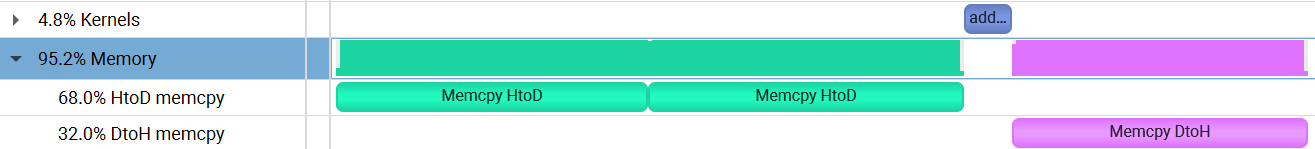

**Nhận xét**: Kết quả từ NVIDIA Nsight System cho thấy khi sử dụng **1 stream**, các hoạt động sao chép bộ nhớ (Host-to-Device và Device-to-Host) **không có sự overlap** với nhau hoặc với việc thực thi hàm kernel trên thiết bị. Điều này được thể hiện qua hình ảnh, trong đó:

1. **Copy Host-to-Device (HtoD)**: Chiếm một phần lớn thời gian, nhưng không chạy song song với hàm kernel hay bất kỳ hoạt động nào khác.
2. **Kernel Execution**: Chỉ bắt đầu sau khi toàn bộ dữ liệu đã được sao chép từ host sang device.
3. **Copy Device-to-Host (DtoH)**: Chỉ diễn ra sau khi hàm kernel kết thúc, không overlap với hàm kernel hoặc bất kỳ hoạt động nào khác.

Điều này dẫn đến tình trạng **sử dụng tài nguyên không hiệu quả**, vì các phần cứng như SM (Streaming Multiprocessors) trên GPU không được sử dụng tối ưu trong khi thực hiện các thao tác sao chép dữ liệu. **Nguyên nhân** là do ta chỉ sử dụng **1 stream**, tất cả các tác vụ được thực hiện theo trình tự tuần tự (sequential execution), không khai thác được tính chất bất đồng bộ (asynchronous) vốn có của CUDA. Để tăng hiệu năng, ta có thể tăng số lượng stream (ví dụ: 2, 4, hoặc 8) để các thao tác HtoD, chạy hàm kernel, và DtoH có thể overlap với nhau, giúp tận dụng tốt hơn các tài nguyên phần cứng.


- Với kích thước block là 512 và số lượng stream bằng 3:

In [15]:
# Generate report with nsight system
!nsys profile ./HW3_P2 512 3

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 14.035872 ms

CORRECT :)
Generating '/tmp/nsys-report-0bf4.qdstrm'
[1/1] [========================100%] report4.nsys-rep
Generated:
    /content/report4.nsys-rep


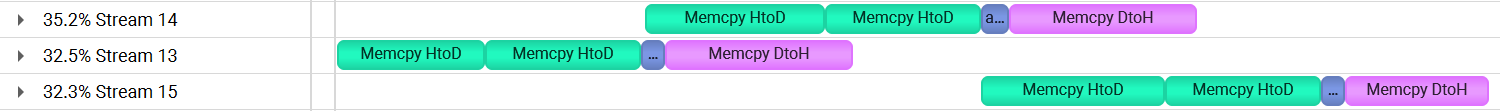

**Nhận xét**: Kết quả từ NVIDIA Nsight System khi sử dụng **3 stream** cho thấy rõ ràng rằng các công việc đã được thực hiện bất đồng bộ (song song) và có sự **overlap** giữa các hoạt động. Điều này được minh họa qua hình ảnh, ta thấy:

1. **Sự overlap giữa các stream**: Các thao tác sao chép dữ liệu (HtoD, DtoH) và thực thi hàm kernel của các stream xảy ra song song. Ví dụ:
   - Trong khi một stream đang thực hiện sao chép dữ liệu HtoD, các stream khác có thể đang chạy hàm kernel hoặc sao chép dữ liệu DtoH.

   - Sự phân bố công việc giữa các stream giúp sử dụng hiệu quả hơn các tài nguyên GPU.

2. **Sự phân bổ tài nguyên tốt hơn**:
   - Thời gian thực thi tổng thể được rút ngắn so với khi sử dụng 1 stream.
   
   - Các giai đoạn HtoD, chạy hàm kernel, và DtoH không bị chờ đợi tuần tự mà được thực hiện xen kẽ, giúp giảm độ trễ.

**Ưu điểm khi sử dụng nhiều stream hơn**:
1. Hiệu quả sử dụng phần cứng được cải thiện đáng kể.

2. Các hoạt động đã tận dụng tính chất bất đồng bộ của CUDA streams, giúp giảm thiểu thời gian nhàn rỗi của GPU và cải thiện thông lượng (throughput).

**Kết luận**: Việc tăng số lượng stream từ 1 lên 3 đã giúp đạt được **sự đồng thời (concurrency)** giữa các công việc. Điều này khẳng định rằng thiết kế chương trình đã bắt đầu khai thác được tính năng mạnh mẽ của CUDA streams.

> References:  
> [1] Slide "CUDA C/C++ - Streams and Concurrency" by Steve Rennich, NVIDIA - [developer.download.nvidia.com](https://developer.download.nvidia.com/CUDA/training/StreamsAndConcurrencyWebinar.pdf).  


In [ ]:
# Generate report with nsight system
# !nsys profile ./a.out